Final Project Biof309:  Investigating global tuberculosis trends from 2000 to 2018

Author: Emma Rowley

Description:  Tuberculosis (TB) is the worlds leading cause of mortality from infectious disease.  Despite being both prevantable and curable more than 10 million cases and 1.5 million deaths occur per year. Significant improvements to the number of incident cases and mortality rates have been made in recent years.  This project will utilized the World Health Organizations published data on TB to explore TB trends over the past two decades. 


Import and install packages

In [279]:
import numpy as np

In [280]:
import pandas as pd

In [281]:
import matplotlib.pyplot as plt

In [282]:
import seaborn as sns

Task 1:  Uploading data and getting familiar 

All data sets used in this project were obtained from the World Health Organization and can be found at https://www.who.int/tb/country/data/download/en/

In [283]:
TB_data = pd.read_csv("TB_burden.csv")

In [284]:
TB_data.head()

,country,iso2,iso3,iso_numeric,g_whoregion,year,e_pop_num,e_inc_100k,e_inc_100k_lo,e_inc_100k_hi,...,cfr,cfr_lo,cfr_hi,cfr_pct,cfr_pct_lo,cfr_pct_hi,c_newinc_100k,c_cdr,c_cdr_lo,c_cdr_hi
0,Afghanistan,AF,AFG,4,EMR,2000,20779953,190.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,34.0,18.0,13.0,28.0
1,Afghanistan,AF,AFG,4,EMR,2001,21606988,189.0,123.0,271.0,...,NaN,NaN,NaN,NaN,NaN,NaN,47.0,25.0,17.0,38.0
2,Afghanistan,AF,AFG,4,EMR,2002,22600770,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,61.0,32.0,23.0,50.0
3,Afghanistan,AF,AFG,4,EMR,2003,23680871,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,58.0,31.0,22.0,48.0
4,Afghanistan,AF,AFG,4,EMR,2004,24726684,189.0,122.0,270.0,...,NaN,NaN,NaN,NaN,NaN,NaN,74.0,39.0,28.0,61.0


What do the variables seen above mean? - Definitions of variable names can be found by downloading the data dictionary csv from the link found on the original page
Lets read this csv into a data frame so we are able to look up the meanings of variables if needed

In [285]:
TB_data_dictionary = pd.read_csv("TB_data_dictionary.csv")

In [286]:
TB_data_dictionary.set_index("variable_name")
#setting the index as variable name to make it quick and easy to find the definitions of a given variable

,dataset,code_list,definition
variable_name,,,
budget_cpp_dstb,Budget,NaN,Average cost of drugs budgeted per patient for...
budget_cpp_mdr,Budget,NaN,Average cost of drugs budgeted per patient for...
budget_cpp_xdr,Budget,NaN,Average cost of drugs budgeted per patient for...
budget_fld,Budget,NaN,Budget required for drugs to treat drug-suscep...
budget_lab,Budget,NaN,"Budget required for laboratory infrastructure,..."
...,...,...,...
ptsurvey_newinc_con_prevtx,Policies and services,NaN,(If prevtx_data_available=61) Number of househ...
pub_new_dx,Policies and services,NaN,Number of new cases of TB diagnosed according ...
pulm_spec_available,Policies and services,0=No; 1=Yes; 2=Not applicable,Are data available on the number of bacteriolo...


How many rows and columns are present in the TB burden CSV? 

In [287]:
TB_data.shape

(4040, 50)

There are 4040 rows and 50 columns or variables present.  Each row contains a country and year of collection and then various data collected about tuberculosis incidence from that year for example cfr is the case fatality ratio of TB for the given year 

Is this data set complete?  Do all countries and years have data for the variables of interest?

In [288]:
missing_obs = TB_data.isna().sum()

In [289]:
missing_proportion = missing_obs / 4040

In [290]:
print(missing_proportion)

country                     0.000000
iso2                        0.004703
iso3                        0.000000
iso_numeric                 0.000000
g_whoregion                 0.000000
year                        0.000000
e_pop_num                   0.000000
e_inc_100k                  0.000000
e_inc_100k_lo               0.000000
e_inc_100k_hi               0.000000
e_inc_num                   0.000000
e_inc_num_lo                0.000000
e_inc_num_hi                0.000000
e_tbhiv_prct                0.151733
e_tbhiv_prct_lo             0.151733
e_tbhiv_prct_hi             0.151733
e_inc_tbhiv_100k            0.151733
e_inc_tbhiv_100k_lo         0.151733
e_inc_tbhiv_100k_hi         0.151733
e_inc_tbhiv_num             0.151733
e_inc_tbhiv_num_lo          0.151733
e_inc_tbhiv_num_hi          0.151733
e_mort_exc_tbhiv_100k       0.000000
e_mort_exc_tbhiv_100k_lo    0.000000
e_mort_exc_tbhiv_100k_hi    0.000000
e_mort_exc_tbhiv_num        0.000000
e_mort_exc_tbhiv_num_lo     0.000000
e

No the the dataset is not complete.  Some variables like e_mort_100k (estimated mortality of all TB cases per 100k) have data points for every row, while others like cfr (case fatality ratio) are missing signifcant portions of data.

Countries are labelled with their fullname, a 2 letter identifier (Iso2), a 3 letter identifier (Iso3), and a numeric identifier (Iso_numeric).  They are also grouped by geographic region (g_whoregion).  However, the definition of g_whoregion does not occur in the csv contianing the variable defintions.  So how many regions are the countries grouped into and what exactly are these regions?

In [291]:
TB_data["g_whoregion"].value_counts()

EUR    1016
AFR     882
AMR     844
WPR     684
EMR     407
SEA     207
Name: g_whoregion, dtype: int64

The countries are grouped into 6 regions.  The full identifiers of the regio codes can be found at: https://apps.who.int/gho/data/node.metadata.REGION?lang=en

What years does this data set contain?  And are all countries accounted for in all years?  Or have some countries only more recently begun collecting this data?

In [292]:
TB_data["year"].value_counts()

2017    216
2015    216
2012    216
2014    216
2016    216
2018    216
2011    216
2013    216
2010    214
2005    211
2007    211
2009    211
2008    211
2006    211
2003    209
2004    209
2002    209
2001    208
2000    208
Name: year, dtype: int64

This data set contains information on TB incidence from 2000 to 2018.  There are more countries with available data in 2018 than there were in 2000.

Now that we have familiarized ourselves a bit with this data set.  Lets see what we can learn from it. 

Task 2: Lets see how the total incidence of TB has changed from 2000 to 2018 on a global scale.  We can do this by creating a list of total number of incident cases per year and visualizing it as a plot.

In [293]:
list_of_years = (TB_data.drop_duplicates("year")["year"]).tolist()

In [294]:
print(list_of_years)

[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018]


In [300]:
e_inc_num_by_year = []
for x in list_of_years:
    def data_by_year(x):
        """This function will yield the sum of all incident cases for all countries in a given year."""
        TB_data_year = TB_data[TB_data["year"]==x]
        return TB_data_year["e_inc_num"].sum()
    e_inc_num_by_year.append(data_by_year(x))

Now we have a list of the total number of incident cases for each year reported on in the data. Lets visualize the trend that the total number of cases has followed.

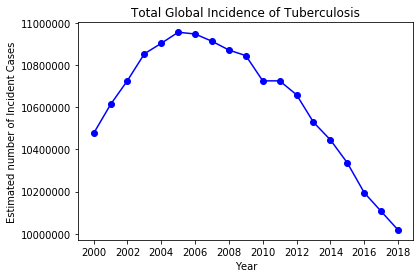

In [303]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list_of_years, e_inc_num_by_year, "bo", linestyle="solid")
ax.set_xlabel("Year")
ax.set_ylabel("Estimated number of Incident Cases")
ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
ax.ticklabel_format(useOffset=False, style='plain')
ax.set_title("Total Global Incidence of Tuberculosis")
plt.show()

Overall, the data shows us that the overall number TB cases globally has decreased from 2000 to 2018.  The number of cases increased in the early 2000's and has decreased from 2005 onwards.  

Task 3:  Let's see if all geographic regions have followed the same trend in overall incidence.  To do this lets create lists of total TB incidence per year based on geographic region. 

In [304]:
TB_data_EMR = TB_data[TB_data["g_whoregion"] == "EMR"]

In [305]:
e_inc_num_by_EMRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_EMRyear = TB_data_EMR[TB_data_EMR["year"]==x]
        return TB_data_EMRyear["e_inc_num"].sum()
    e_inc_num_by_EMRyear.append(data_by_year(x))

In [306]:
TB_data_AFR = TB_data[TB_data["g_whoregion"] == "AFR"]

In [307]:
e_inc_num_by_AFRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_AFRyear = TB_data_AFR[TB_data_AFR["year"]==x]
        return TB_data_AFRyear["e_inc_num"].sum()
    e_inc_num_by_AFRyear.append(data_by_year(x))

In [308]:
TB_data_EUR = TB_data[TB_data["g_whoregion"] == "EUR"]

In [309]:
e_inc_num_by_EURyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_EURyear = TB_data_EUR[TB_data_EUR["year"]==x]
        return TB_data_EURyear["e_inc_num"].sum()
    e_inc_num_by_EURyear.append(data_by_year(x))

In [310]:
TB_data_AMR = TB_data[TB_data["g_whoregion"] == "AMR"]

In [311]:
e_inc_num_by_AMRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_AMRyear = TB_data_AMR[TB_data_AMR["year"]==x]
        return TB_data_AMRyear["e_inc_num"].sum()
    e_inc_num_by_AMRyear.append(data_by_year(x))

In [312]:
TB_data_WPR = TB_data[TB_data["g_whoregion"] == "WPR"]

In [313]:
e_inc_num_by_WPRyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_WPRyear = TB_data_WPR[TB_data_WPR["year"]==x]
        return TB_data_WPRyear["e_inc_num"].sum()
    e_inc_num_by_WPRyear.append(data_by_year(x))

In [314]:
TB_data_SEA = TB_data[TB_data["g_whoregion"] == "SEA"]

In [315]:
e_inc_num_by_SEAyear = []
for x in list_of_years:
    def data_by_year(x):
        TB_data_SEAyear = TB_data_SEA[TB_data_SEA["year"]==x]
        return TB_data_SEAyear["e_inc_num"].sum()
    e_inc_num_by_SEAyear.append(data_by_year(x))

Now that we have the total number of incident cases by year for each region, lets use a plot to visualize the trends. 

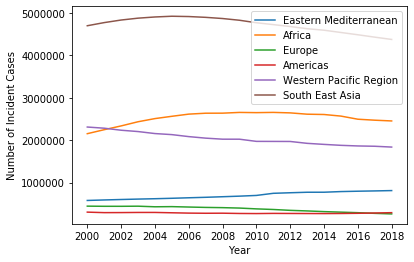

In [323]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.plot(list_of_years, e_inc_num_by_EMRyear, label="Eastern Mediterranean", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_AFRyear, label="Africa", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_EURyear, label="Europe", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_AMRyear, label="Americas", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_WPRyear, label="Western Pacific Region", linestyle="solid")
ax.plot(list_of_years, e_inc_num_by_SEAyear, label= "South East Asia", linestyle="solid")
ax.set_xlabel("Year")
ax.set_ylabel("Number of Incident Cases")
ax.set_xticks([2000, 2002, 2004, 2006, 2008, 2010, 2012, 2014, 2016, 2018])
plt.legend()
plt.show()

This plot shows us that South East Asian countries account for the majority of TB cases.  However, their overall cases incidence numbers have followed the same trend as the global plot we created. Overall, cases declined from 2000 to 2018 with increases in cases occuring in the early 2000s. The Western Pacific Region, and Europe have seen steady declines in cases since 2000, while incidence has remained fairly consistent in the US. Africa and the Eastern Mediterranean have actually seen slight increases in cases from 2000 to 2018.  So, TB incidence is declining on the whole, but not all countries and regions have seen a decline in cases.

Task 4: Lets see what countries have actually seen increases in tuberculosis cases since 2000. To do this, we can create a table with only the countries that have seen case increases and since 2000 and then see to what extent these increases have occurred. Since population has changed overtime,  lets look at the numbers per 100k instead of overall numbers cases. 

In [325]:
TB_data_2000 = TB_data[TB_data["year"] == 2000]

In [326]:
TB_2000_candinc =  TB_data_2000[["country", "g_whoregion", "e_inc_100k"]]

In [327]:
TB_2000_index = TB_2000_candinc.set_index("country")

In [328]:
TB_2000_labindex = TB_2000_index.rename(columns = {"e_inc_100k":"e_inc_100k_2000"})

In [329]:
TB_data_2018 = TB_data[TB_data["year"] == 2018]

In [330]:
TB_2018_candinc =  TB_data_2018[["country", "e_inc_100k"]]

In [331]:
TB_2018_index = TB_2018_candinc.set_index("country") 

In [332]:
TB_2018_labindex = TB_2018_index.rename(columns = {"e_inc_100k":"e_inc_100k_2018"})

In [333]:
TB_2000_2018 = pd.concat([TB_2000_labindex, TB_2018_labindex], axis = 1, join="inner")

In [367]:
TB_greater_2018 = TB_2000_2018[TB_2000_2018["e_inc_100k_2018"] > TB_2000_2018["e_inc_100k_2000"]]

In [374]:
print(TB_greater_2018.index)

Index(['Angola', 'Australia', 'Bermuda', 'Congo', 'Cyprus', 'Dominica',
       'El Salvador', 'Equatorial Guinea', 'Fiji', 'Gabon', 'Grenada', 'Guam',
       'Guinea-Bissau', 'Guyana', 'Liberia', 'Malaysia', 'Malta',
       'Marshall Islands', 'Micronesia (Federated States of)', 'Mozambique',
       'Nauru', 'Niue', 'Palau', 'Panama', 'Paraguay', 'Republic of Korea',
       'Republic of Moldova', 'Sao Tome and Principe', 'Suriname', 'Sweden',
       'Tokelau', 'Trinidad and Tobago', 'Tunisia', 'Tuvalu', 'Uruguay',
       'Venezuela (Bolivarian Republic of)'],
      dtype='object', name='country')


In [375]:
len(TB_greater_2018.index)

36

36 countries saw an increase in the number of cases per 100k in 2018 compared to 2000.  Lets see what regions these countries are found in.  We can do this by creating a bar chart with the value counts for each of the regions. 

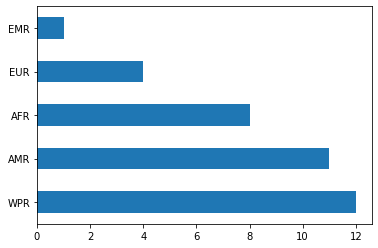

In [355]:
TB_greater_2018['g_whoregion'].value_counts().plot(kind='barh')

The Western Pacific Region has the most countries with an increase in the number of cases since 2000, while the Eastern Mediterranean has seen the least.  Interestingly, no countries in South East Asia have seen an increase in cases. 

In [390]:
TB_2000_2018["TB_incidence_change"] = TB_2000_2018["e_inc_100k_2018"] - TB_2000_2018["e_inc_100k_2000"]

In [391]:
TB_greater_2018 = TB_2000_2018[TB_2000_2018["TB_incidence_change"] >= 0]

In [392]:
#TB_greater_2018.reset_index()

In [393]:
#TB_increase_changeindex = TB_greater_2018.set_index("TB_incidence_change")

In [394]:
#TB_increase_changeindex.sort_index()

Task 5: Create a heatmap with rankings of indicators of TB burden by country for 2018. So far,  we have looked at the general trends in TB incidence over time for different geographic regions.  But, our data set contains a lot more variables we have not yet explored.  What if we wanted to use some of the different variables found in this data set as indicators of a countries general outlook when it comes to tuberculosis as a public health problem.  To visualize these indicators, lets create a heatmap.  In this heatmap, countries will be ranked according to several indicators.  A color code will then be employed to indicate where a given country sits in the overall ranking. Lets look at the data for 2018, since that is our most recent year. 

In [377]:
TB_data_2018_HM = TB_data[TB_data["year"]==2018]

Our dataset contains alot of variables, many of which tell us very similar information.  Lets remove some of these variables so that the heatmap isn't too overwhelming.  High and low bound estimates will be removed so that only actual estimates will be ranked in the heatmap.  Also, lets only include estimates per 100k rather than for the whole population.  This will make sure we are taking into account that larger populations will likely have larger numbers of TB cases. 

In [378]:
clean_2018 = TB_data_2018_HM.drop(["iso2","iso3", "e_inc_tbhiv_num_hi", "iso_numeric", "g_whoregion", "year", "e_pop_num", "e_inc_100k_lo", "e_tbhiv_prct", "e_inc_100k_hi", "e_inc_num_hi", "e_inc_num_lo", "e_pop_num", "e_tbhiv_prct_lo", "e_tbhiv_prct_hi", "e_inc_tbhiv_100k_lo", "e_inc_tbhiv_100k_hi", "cfr_lo", "cfr_hi", "e_inc_tbhiv_num_lo", "e_mort_num_lo", "cfr_pct_hi", "e_mort_num_hi", "cfr_pct_lo", "c_cdr_lo", "c_cdr_hi", "e_mort_100k_hi", "e_mort_100k_lo", "e_mort_tbhiv_num_hi", "e_mort_tbhiv_num_lo", "e_mort_exc_tbhiv_100k_hi", "e_mort_exc_tbhiv_100k_lo", "e_mort_tbhiv_100k_lo", "e_mort_tbhiv_100k_hi", "e_mort_tbhiv_100k_lo", "e_mort_exc_tbhiv_num_hi", "e_mort_exc_tbhiv_100k_lo", "e_mort_exc_tbhiv_num_lo","e_mort_exc_tbhiv_100k_hi", "e_mort_exc_tbhiv_num", "e_mort_exc_tbhiv_num", "e_mort_num", "e_mort_tbhiv_num", "e_inc_tbhiv_num", "e_inc_num", "e_mort_tbhiv_num", "cfr"], axis=1)

In [379]:
clean_2018 = clean_2018.set_index("country")

Now we have a dataframe several indicators of the severity of TB as a public health problem for different countries.  Lets now rank these countries from 1 to 216 based on their performance with rank 1 being the country performing best on a given indicator.  The indicators will be as follows: Incidence per 100k, Incidence of HIV positive cases per 100k, Mortality of HIV negative cases per 100K, Mortality of HIV positive cases per 100k, Total mortality per 100k, Case fatality ratio, New incident cases per 100k, and Case detection rate.

In [380]:
clean_2018["Incidence per 100k"] = clean_2018["e_inc_100k"].rank(method="max")

In [381]:
clean_2018["Incidence of HIV positive cases per 100k"] = clean_2018["e_inc_tbhiv_100k"].rank(method="max")

In [382]:
clean_2018["Mortality of HIV negative cases per 100K"] = clean_2018["e_mort_exc_tbhiv_100k"].rank(method="max")

In [383]:
clean_2018["Mortality of HIV positive cases per 100k"] = clean_2018["e_mort_tbhiv_100k"].rank(method="max")

In [384]:
clean_2018["Total mortality per 100k"] = clean_2018["e_mort_100k"].rank(method="max")

In [385]:
clean_2018["Case fatality ratio"] = clean_2018["cfr_pct"].rank(method="max")

In [386]:
clean_2018["New incident cases per 100k"] = clean_2018["c_newinc_100k"].rank(method="max")

In [387]:
clean_2018["Case detection rate"] = clean_2018["c_cdr"].rank(method="max", ascending=False)

In [388]:
rankings_2018 = clean_2018[["Incidence per 100k", "Incidence of HIV positive cases per 100k", "Mortality of HIV negative cases per 100K", "Mortality of HIV positive cases per 100k", "Total mortality per 100k", "Case fatality ratio", "New incident cases per 100k", "Case detection rate"]]

Now that we have our countries ranked by indicator.  Lets create a heatmap to visualize our data.  On this heat map, dark blue will indicate a high ranking or positive outcomes while dark red will indicate a low ranking or negative outcome.

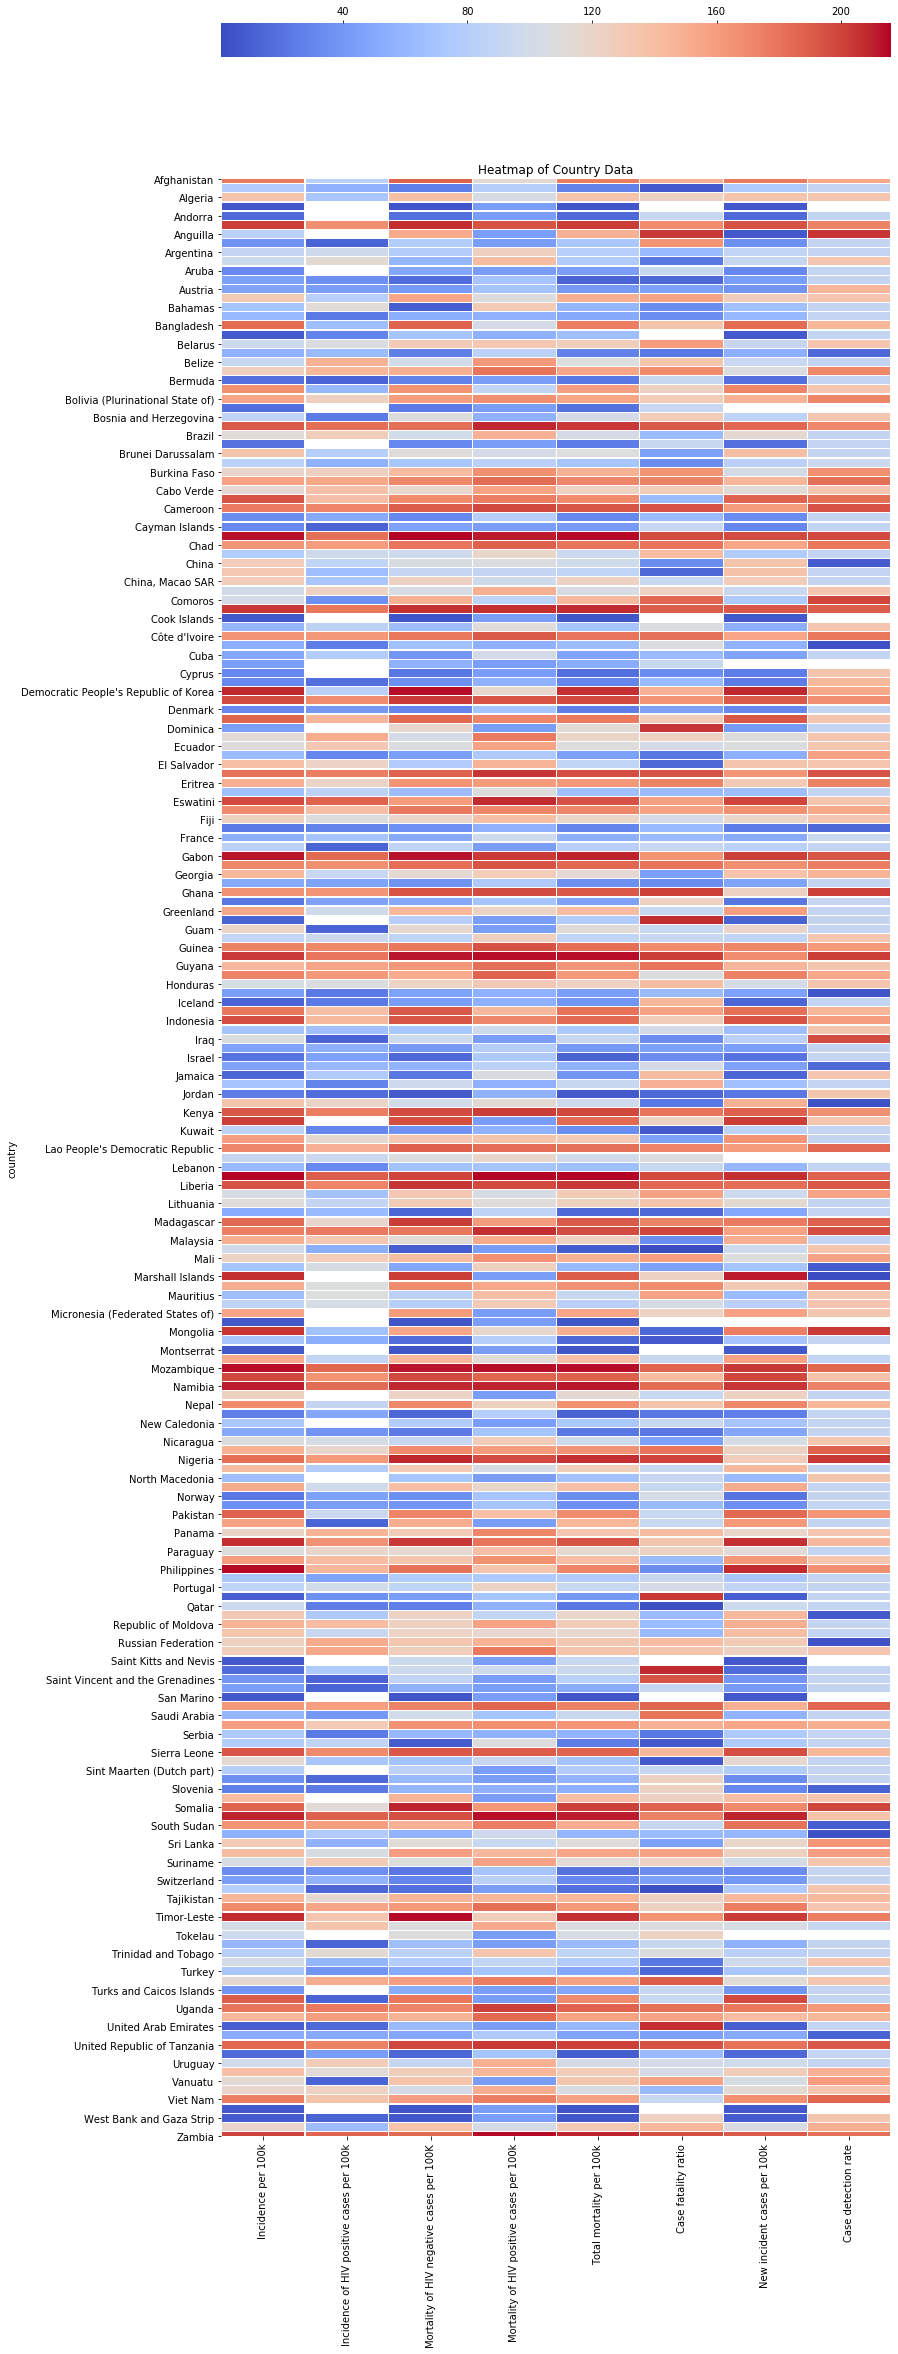

In [389]:
#import numpy as np; np.random.seed(0)
#import seaborn as sns; sns.set()
fig_dims=(12,45)
fig, ax = plt.subplots(figsize=fig_dims)
ax = sns.heatmap(rankings_2018, vmin=1, vmax=216, linewidth=.2, cbar_kws = dict(use_gridspec=False,location="top"), cmap="coolwarm")
# split axes of heatmap to put colorbar
#ax_divider = make_axes_locatable(ax)
# define size and padding of axes for colorbar
#cax = ax_divider.append_axes('top', size = '5%', pad = '2%')
# make colorbar for heatmap. 
# Heatmap returns an axes obj but you need to get a mappable obj (get_children)
#colorbar(ax.get_children()[0], cax = cax, orientation = 'horizontal')
# locate colorbar ticks
#cax.xaxis.set_ticks_position('top')
ax.set_title("Heatmap of Country Data")
plt.show()

Conclusions: